# ***TensorFlow Classification***

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

In [0]:
diabetes=pd.read_csv('/content/drive/My Drive/Tensorflow-Bootcamp-master/pima-indians-diabetes.csv')

In [0]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [0]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [0]:
cols_to_norm=['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [0]:
diabetes[cols_to_norm]=diabetes[cols_to_norm].apply(lambda x: (x-x.min()) / (x.max()-x.min()) )

In [0]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [0]:
import tensorflow as tf


In [0]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [0]:
# to make categorical column
assigned_group=tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [0]:
# assigned_group=tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [0]:
import matplotlib.pyplot as plt

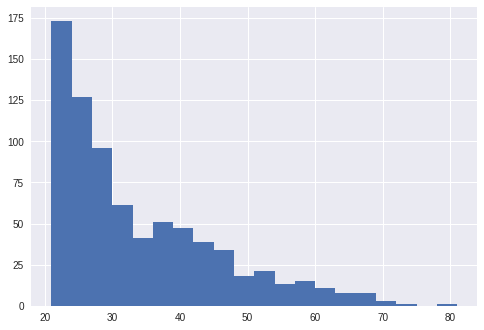

In [0]:
diabetes['Age'].hist(bins=20)
plt.show()

In [0]:
# to make categorical column for contineous data
age_bucket=tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [0]:
feat_cols=[num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

In [0]:
x_data=diabetes.drop('Class',axis=1)

In [0]:
labels=diabetes['Class']

In [0]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


# ***Split***

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(x_data,labels,test_size=0.3,random_state=101)

In [0]:
X_train.shape

(537, 9)

In [0]:
X_test.shape

(231, 9)

# ***Estimator***

In [0]:
input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,
                                               y=y_train,
                                               batch_size=10,
                                               num_epochs=1000,
                                               shuffle=True)

In [0]:
model=tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpnbelihdw', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f1479e29748>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
model.train(input_fn=input_func,steps=1000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpnbelihdw/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 255.637
INFO:tensorflow:loss = 10.073755, step = 101 (0.400 sec)
INFO:tensorflow:global_step/sec: 379.749
INFO:tensorflow:loss = 5.976165, step = 201 (0.260 sec)
INFO:tensorflow:global_step/sec: 3

In [0]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                    y=y_test,
                                                    batch_size=10,
                                                    num_epochs=1,
                                                    shuffle=False)

In [0]:
results=model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-20T17:23:55Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmpnbelihdw/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-02-20-17:23:56
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.8033333, auc_precision_recall = 0.64530355, average_loss = 0.52476054, global_step = 1000, label/mean = 0.35064936, loss = 5.0508204, precision = 0.6666667, prediction/mean = 0.35830873, recall = 0.5185185
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpnbelihdw/model.ckpt-1000


In [0]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8033333,
 'auc_precision_recall': 0.64530355,
 'average_loss': 0.52476054,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0508204,
 'precision': 0.6666667,
 'prediction/mean': 0.35830873,
 'recall': 0.5185185}

In [0]:
pred_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                   y=y_test,
                                                   num_epochs=1,
                                                   shuffle=False)

In [0]:
predictions=model.predict(pred_input_func)

In [0]:
my_pred=list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpnbelihdw/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [0]:
my_pred[0]

{'class_ids': array([1]),
 'classes': array([b'1'], dtype=object),
 'logistic': array([0.51377887], dtype=float32),
 'logits': array([0.05512953], dtype=float32),
 'probabilities': array([0.48622113, 0.5137789 ], dtype=float32)}

# ***DNN Classifier***

In [0]:
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,10,10],
                                     feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpykqdgbps', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f147179e4a8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
# Need to tell tf that categorical columns has #of dimentions
#dnn_model.train(input_fn=input_func,steps=1000) gives error

In [0]:
embedded_group_column=tf.feature_column.embedding_column(assigned_group,dimension=4)

In [0]:
feat_cols=[num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_column, age_bucket]

In [0]:
input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,
                                              batch_size=10,
                                              num_epochs=1000,
                                              shuffle=True)

In [0]:
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,10,10],
                                    feature_columns=feat_cols,
                                    n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpzi4zl3t_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f1479096550>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpzi4zl3t_/model.ckpt.
INFO:tensorflow:loss = 6.9922333, step = 1
INFO:tensorflow:global_step/sec: 223.867
INFO:tensorflow:loss = 5.6299124, step = 101 (0.458 sec)
INFO:tensorflow:global_step/sec: 341.368
INFO:tensorflow:loss = 2.886788, step = 201 (0.298 sec)
INFO:tensorflow:global_step/sec: 329.164
INFO:tensorflow:loss = 3.6510708, step = 301 (0.302 sec)
INFO:tensorflow:global_step/sec: 317.996
INFO:tensorflow:loss = 3.65972, step = 401 (0.307 sec)
INFO:tensorflow:global_step/sec: 300.93
INFO:tensorflow:loss = 4.975978, step = 501 

# ***Test***

In [0]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,
                                                   batch_size=10,
                                                   num_epochs=1,
                                                   shuffle=False)

In [0]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-20T17:24:05Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpzi4zl3t_/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-02-20-17:24:06
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7619048, accuracy_baseline = 0.64935064, auc = 0.8268313, auc_precision_recall = 0.69274706, average_loss = 0.482467, global_step = 1000, label/mean = 0.35064936, loss = 4.643745, precision = 0.6805556, prediction/mean = 0.36060068, recall = 0.60493827
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpzi4zl3t_/model.ckpt-1000


{'accuracy': 0.7619048,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8268313,
 'auc_precision_recall': 0.69274706,
 'average_loss': 0.482467,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.643745,
 'precision': 0.6805556,
 'prediction/mean': 0.36060068,
 'recall': 0.60493827}